In [1]:
# To remove the FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import scipy as sp
from scipy import  stats

sns.set_theme()

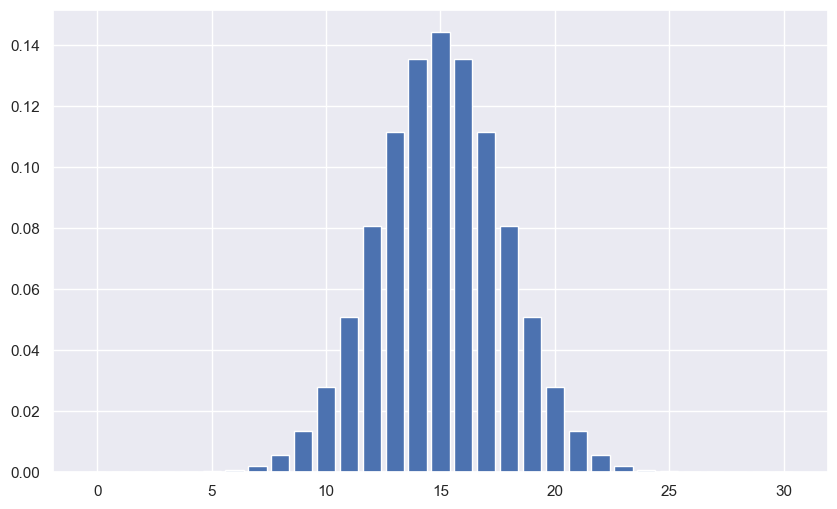

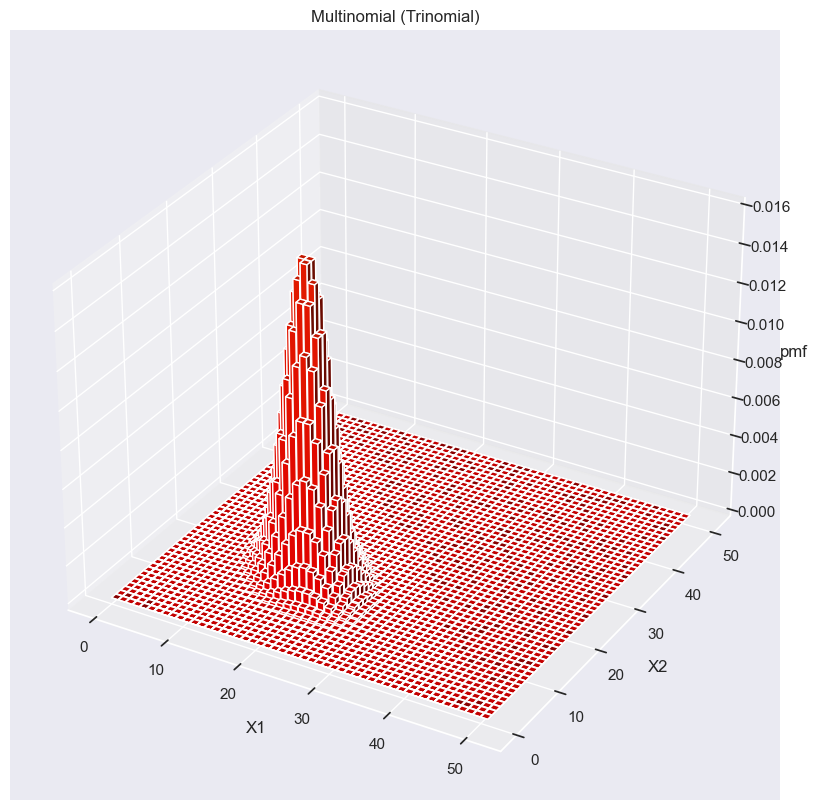

# Empirical distribution

Given the data $\mathcal{D = \{x_1, ..., x_N \}$ the empirical distribution of this data is given by

$$
p_{emp}(A) = \epsilon_N (A) = \frac{1}{N} \sum^{N}_{i=1} \delta_{x_i} (A)
$$

It is basically the discrete probability distribution of our observed data. Any point not in our data has probability 0

Its summation gives a discrete step wise CDF 

$$
\hat{F}_N(t) = \frac{1}{N} \sum^{N}_{i=1} 1\{ x_i < t\}
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


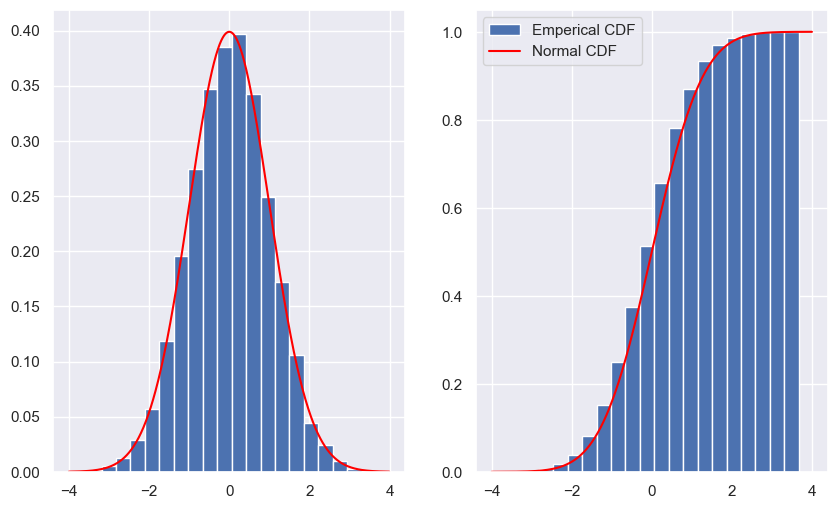

In [9]:
x = np.random.normal(loc=0, scale=1, size=10000)
x_range = np.arange(-4, 4, 0.01)

normal = lambda x : 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x ** 2)
y = normal(x_range)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].hist(x, bins=20, label='Emperical Distribution', density=True)
ax[0].plot(x_range, y, label='Normal Distribution', color='red')
plt.legend()


ax[1].hist(x, bins=20, cumulative=True, density=True, label='Emperical CDF')
ax[1].plot(x_range, np.cumsum(y) / np.sum(y), label='Normal CDF', color='red')

plt.legend()
plt.show()

# Normal Distribution

The PDF of the normal distribution is given by:

$$
p(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left(- \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

and the CDF is given by:

$$
\Phi (x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt
$$

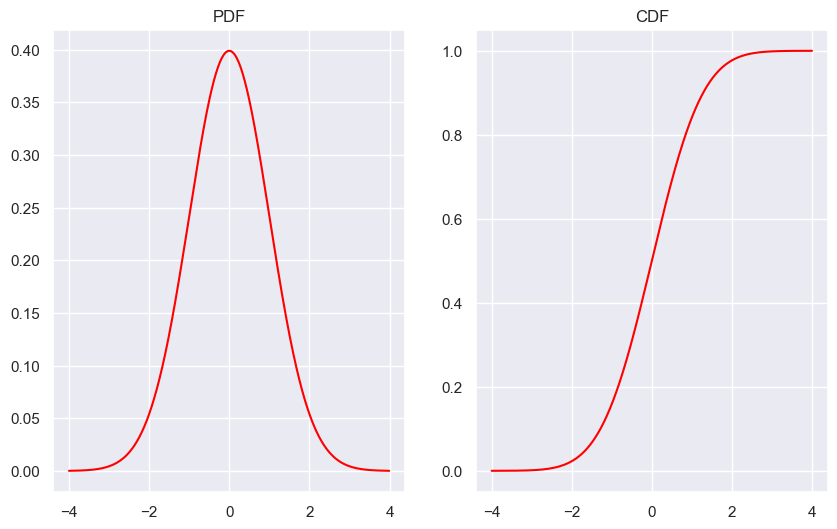

In [10]:
x_range = np.arange(-4, 4, 0.01)

normal = lambda x : 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x ** 2)
y = normal(x_range)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].set_title('PDF')
ax[0].plot(x_range, y, label='Normal Distribution', color='red')

ax[1].set_title('CDF')
ax[1].plot(x_range, np.cumsum(y) / np.sum(y), label='Normal CDF', color='red')
plt.show();

The normal distribution is a symmetric function therefor

$$
\Phi^{-1}(1 - \alpha / 2) = -\Phi^{-1}(\alpha / 2)
$$

or 

$$
\Phi(- \alpha/2) = 1 - \Phi(\alpha/2)
$$

Here for $\alpha$ = 0.05 we get a 95 % interval, meaning that 95% of the time we are in this interval, or 95% of our values are in this range

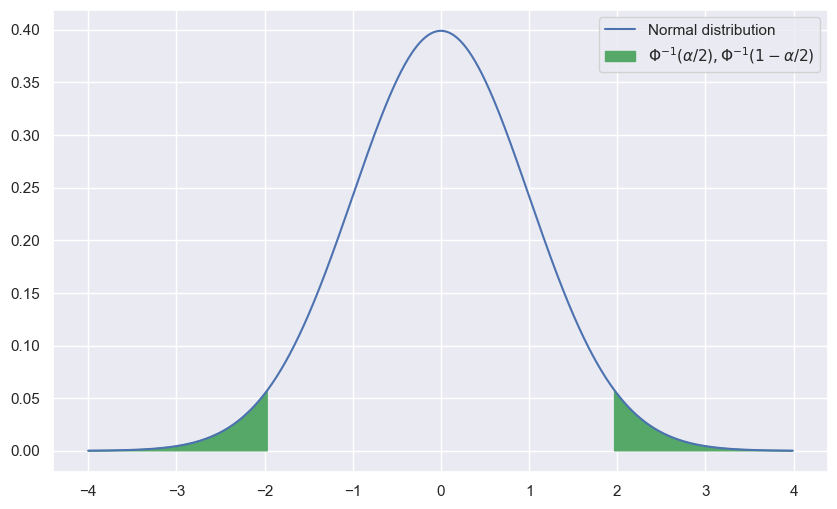

In [11]:
x = np.arange(-4, 4, 0.01)
normal = lambda x : 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x ** 2)
y = normal(x_range)

pos_1 = np.argmax((np.cumsum(y) / np.sum(y)) >= 0.025)
pos_2 = np.argmax((np.cumsum(y) / np.sum(y)) >= 0.975)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal distribution')
plt.fill_between(x, y, where = (x < x[pos_1]) | (x > x[pos_2]), color='g', label=r'$\Phi^{-1}(\alpha/2),  \Phi^{-1}(1 - \alpha/2)$')
plt.legend()

Let $X$ $Y$ be independent normal RVs, then their sum is also normally distributed:

$$
X \sim \mathcal(\mu_X, \sigma_X^2), Y \sim \mathcal(\mu_Y, \sigma_Y^2) \Rightarrow X + Y \sim \mathcal(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)
$$
and $Y = a + bX \sim \mathcal{N}(c + b \mu,b^2 \sigma^2)$ 

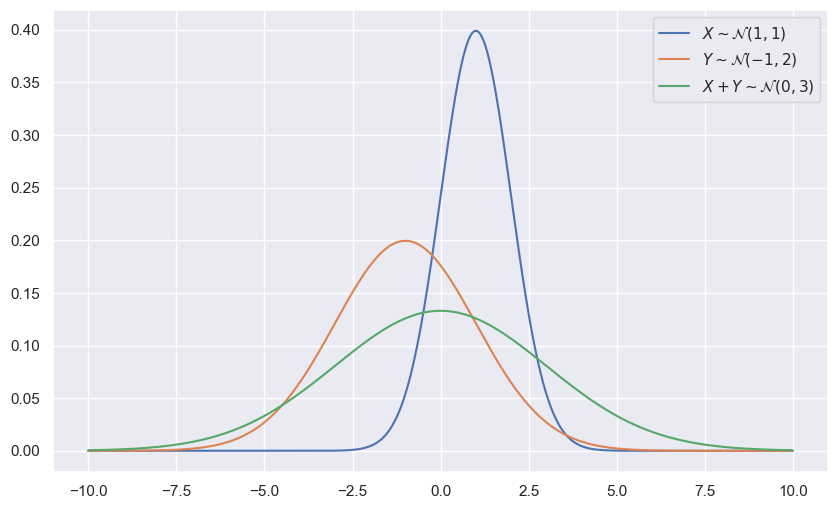

In [18]:
x = np.arange(-10, 10, 0.01)
X = stats.norm(loc=1, scale=1)
Y = stats.norm(loc=-1, scale=2)
Z = stats.norm(loc=0, scale=3)
plt.figure(figsize=(10, 6))
plt.plot(x, X.pdf(x), label=r'$X\sim\mathcal{N}(1, 1)$')
plt.plot(x, Y.pdf(x), label=r'$Y\sim\mathcal{N}(-1, 2)$')
plt.plot(x, Z.pdf(x), label=r'$X + Y\sim\mathcal{N}(0, 3)$')
plt.legend()
plt.show()

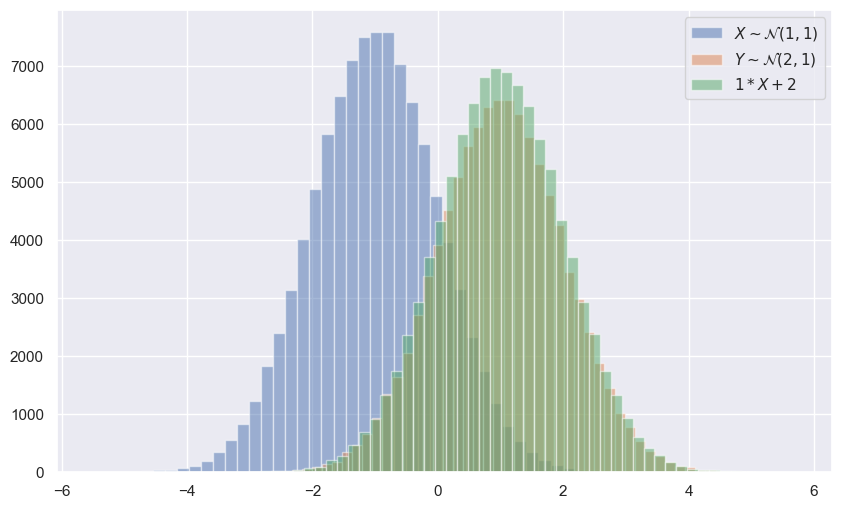

In [51]:
x = np.arange(-10, 10, 0.01)
mu = -1
sigma = 1
a = 2
b = 1
X = stats.norm(loc=mu, scale=sigma)
Y = stats.norm(loc=a + mu*b, scale=b * sigma)

plt.figure(figsize=(10, 6))
plt.hist(X.rvs(size=100000), bins=50, alpha=0.5, label=r'$X\sim\mathcal{N}(1, 1)$')
plt.hist(Y.rvs(size=100000), bins=50, alpha=0.5, label=r'$Y\sim\mathcal{N}(2, 1)$')
plt.hist(X.rvs(size=100000)*b + a, bins=50, alpha=0.5, label=r'$1*X+2$')
plt.legend()
plt.show()

# Dirac Function

For $\sigma^2 \rightarrow 0$ we get the so called dirac function which is infinite at the mean and zero everywhere else.

$$
\delta(x) = 
\begin{cases}
 \infty, \ x = 0 \\
 0, \ x \not = 0
\end{cases}
$$

It's properties are

$$
\int_{-\infty}^{\infty} \delta(x) dx = 1
$$

And multiplying with another function in an integral gives

$$
\int_{-\infty}^{\infty}f(x) \delta(x - z) dx = f(z)
$$

# Multivariate normal distribution

The multivariate normal distribution of a K-Dimensional random vector $\mathbf{X} = (X_1, ..., X_k)^T$ can be written as 

$$
\mathbf{X} \sim \mathcal{N}(\mathbf{\mu}, \Sigma)
$$

with $\mathbf{\mu} = [ \mathbb{E}[X_1], ..., \mathbb{E}[X_k]]$ and $\Sigma$ being the covariance matrix

$$
\Sigma = \mathbb{E}[(\mathbf{X} - \mathbf{\mu})(\mathbf{X} - \mathbf{\mu})^T] = Cov[X_i, X_j]; 1 \leq i, j \leq k
$$

The pdf is then given by:

$$
p(x_1, ..., x_k | \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} \exp \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu})  \right)
$$

[[3.54458508e-23 3.54434878e-23 3.54363998e-23 ... 5.88921162e-52
  5.15579920e-52 4.51312043e-52]
 [3.91711119e-23 3.91711119e-23 3.91658895e-23 ... 6.95542645e-52
  6.08963902e-52 5.33091098e-52]
 [4.32821165e-23 4.32850020e-23 4.32821165e-23 ... 8.21357937e-52
  7.19166085e-52 6.29604802e-52]
 ...
 [6.50858542e-52 7.43492733e-52 8.49197958e-52 ... 4.78181943e-23
  4.78245705e-23 4.78245705e-23]
 [5.51123538e-52 6.29604802e-52 7.19166085e-52 ... 4.32734609e-23
  4.32821165e-23 4.32850020e-23]
 [4.66609316e-52 5.33091098e-52 6.08963902e-52 ... 3.91554466e-23
  3.91658895e-23 3.91711119e-23]]


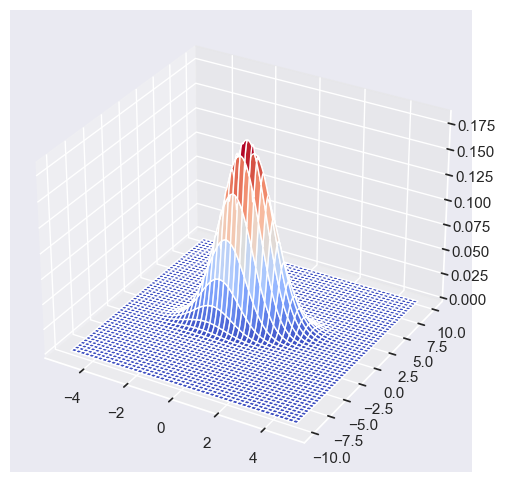

In [3]:
x = np.arange(-5, 5, 0.01)
y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = stats.multivariate_normal([0, 0], [[1, .5], [.5, 1]])
Z = rv.pdf(pos)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

(-3.0, 3.0)

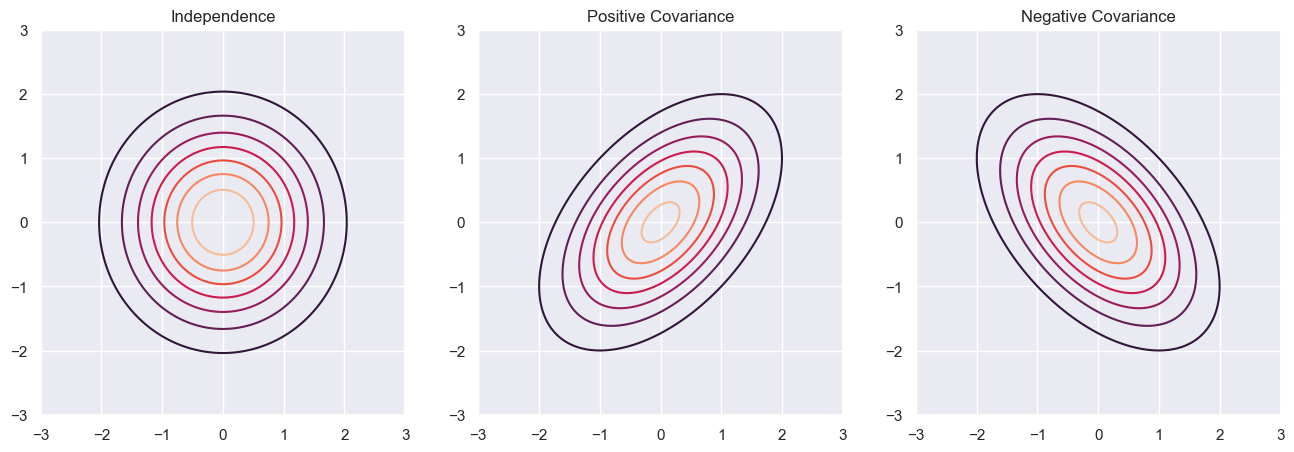

In [45]:
fix, axs = plt.subplots(1, 3, figsize=(16, 5))

rv1 = stats.multivariate_normal([0, 0], [[1, 0], [0, 1]])
Z1 = rv1.pdf(pos)
rv2 = stats.multivariate_normal([0, 0], [[1, .5], [.5, 1]])
Z2 = rv2.pdf(pos)
rv3 = stats.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]])
Z3 = rv3.pdf(pos)

origin = np.array([[0],[0]])

axs[0].contour(X, Y, Z1)
axs[1].contour(X, Y, Z2)
axs[2].contour(X, Y, Z3)

axs[0].set_title('Independence')
axs[1].set_title('Positive Covariance')
axs[2].set_title('Negative Covariance')

axs[0].set_xlim([-3, 3])
axs[0].set_ylim([-3, 3])
axs[1].set_xlim([-3, 3])
axs[1].set_ylim([-3, 3])
axs[2].set_xlim([-3, 3])
axs[2].set_ylim([-3, 3])

The marginalization, taking apart a multivariate gaussian into 1D distributions, we again get gaussian distributions:
If:
$$
\mathbf{x} \sim \mathcal{N}(\mathbf{\mu}, \Sigma) \quad \text{with} \quad \mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}, \mathbf{\mu} = \begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix}, \Sigma = \begin{pmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{pmatrix}
$$
Then we get 

$$
x_1 \sim \mathcal{N}(\mu_1,\Sigma_{11})  \quad \text{and} \quad x_2 \sim \mathcal{N}(\mu_2,\Sigma_{22})
$$

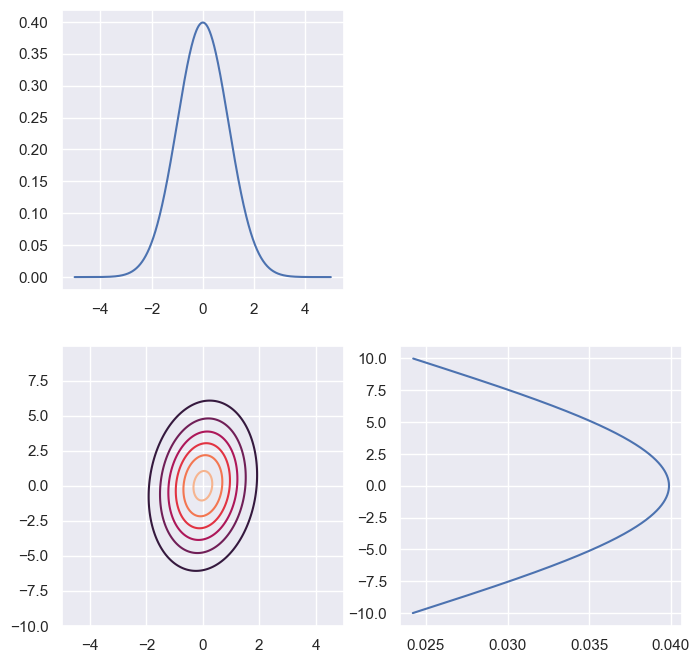

In [77]:
x = np.arange(-5, 5, 0.01)
y = np.arange(-10, 10, 0.01)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = stats.multivariate_normal([0, 0], [[1, .4], [.4, 10]])
Z = rv.pdf(pos)

rv_normal = stats.norm(loc=0, scale=1)
y_normal1 = rv_normal.pdf(x)
rv_normal = stats.norm(loc=0, scale=10)
y_normal2 = rv_normal.pdf(y)

fix, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0, 1].axis('off')

axs[0, 0].plot(x, y_normal1)
axs[1,0].contour(X, Y, Z)
axs[1, 1].plot(y_normal2, y)
plt.show()

The conditional probability over two gaussian distributions again gives a gaussian distribution. Given
$$
\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$
Then by setting $x_2 | x_1$, we fix $x_1$ to a variable and let $x_2$ vary, giving a 'slice' of the multivariate distribution along the axis $x_2$ for a fixed $x_1$.

$$
x_2 | x_1 \sim \mathcal{N}(\mu_2 + \Sigma_{21} \Sigma_{11}^{-1} (x_1 - \mu_1), \Sigma_{22} - \Sigma_{21} \Sigma_{11}^{-1} \Sigma_{12})
$$

A gaussian can be transformed via the following formula with $\mathbf{X} \sim \mathcal{N}(\mathbf{\mu}, \Sigma)$:

$$
\mathbf{Y} = \mathbf{c} + B \mathbf{X} \sim \mathcal{N}(\mathbf{c} + B \mathbf{\mu}, B \Sigma B^T)
$$

Proof:

$$
1. \mathbb{E}[\mathbf{c} + B \mathbf{X}] = \mathbf{c} + B \mathbb{E}[\mathbf{X}] = \mathbf{c} + B \mathbf{\mu} \\
2. \mathbb{E}[(\mathbf{c} + B \mathbf{X} - \mathbf{c} + B \mathbf{\mu})(\mathbf{c} + B \mathbf{X} - \mathbf{c} + B \mathbf{\mu})^T] = 
\mathbb{E}[(B \mathbf{X} - B \mathbf{\mu})(B \mathbf{X} - B \mathbf{\mu})^T] = \mathbb{E}[B(\mathbf{X} - \mathbf{\mu})(\mathbf{X} - \mathbf{\mu})^T B^T] = B \Sigma B^T
$$

# Uniform Distribution
The Uniform probability density function is defined as:
$$X \sim Unif(a, b) \Rightarrow f_X(x) = 
\begin{cases}
\frac{1}{b - a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}$$

The Uniform cumulative distrubution function is defined as:
$$F_X(x) =
\begin{cases}
0 & \text{if } x < a \\
\frac{x - a}{b - a} & \text{if } a \leq x \leq b \\
1 & \text{if } x > b
\end{cases}$$

In [11]:
def uniform_cdf(a: float, b: float, x: float) -> np.array:
    return (1 / (b - a)) * (a <= x) * (x <= b)

def uniform_pdf(a: float, b: float, x: float) -> np.array:
    return np.where(x < a, 0, np.where(x <= b, (x - a)/(b - a), 1))

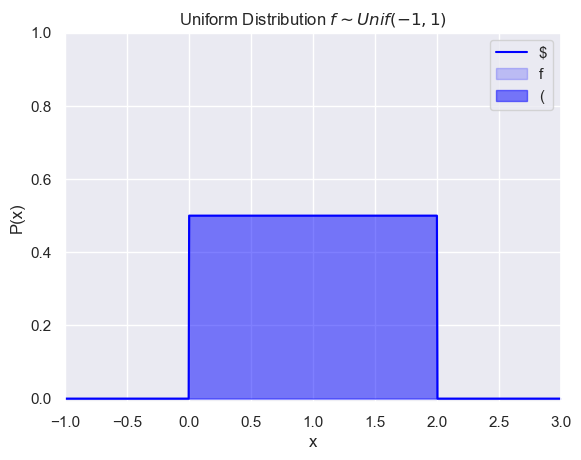

In [12]:
a = 0
b = 2
x = np.linspace(-1, 3, 1000)

axS = sns.lineplot(x=x, y=uniform_cdf(a, b, x), color='blue')
axS.fill_between(x, uniform_cdf(a, b, x), color='blue', alpha=0.5)
plt.title(r'Uniform Distribution $f \sim Unif(-1, 1)$')
plt.legend('$f(x)$')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.xlim(-1, 3)
plt.ylim(-0.01, 1);
plt.show()

In [13]:
def gaussian_distribution(mu: float, sigma: float, x: float) -> float:
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

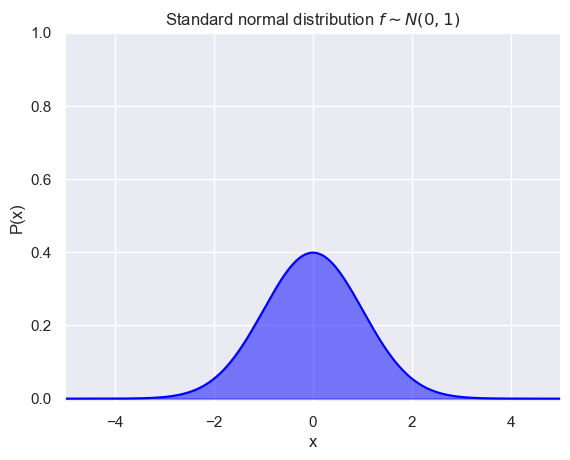

In [14]:
x = np.linspace(-5, 5, 1000)
y = gaussian_distribution(0, 1, x)
plt.title(r'Standard normal distribution $f \sim N(0, 1)$')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.xlim(-5, 5)
plt.ylim(-0.01, 1)
ax = sns.lineplot(x=x, y=y, color='blue')
ax.fill_between(x, y, color='blue', alpha=0.5)

# Laplace Distribution

The Laplace probability density function is defined as:
$$X \sim Laplace(\mu, b) \Rightarrow f_X(x) = \frac{1}{2b} \exp\left(-\frac{|x - \mu|}{b}\right)$$

In [15]:
def laplace_distribution(mu: float, b: float, x: float) -> float:
    return (1 / (2 * b)) * np.exp(-np.abs(x - mu) / b)

x = np.linspace(-5, 5, 1000)
y = laplace_distribution(0, 1, x)

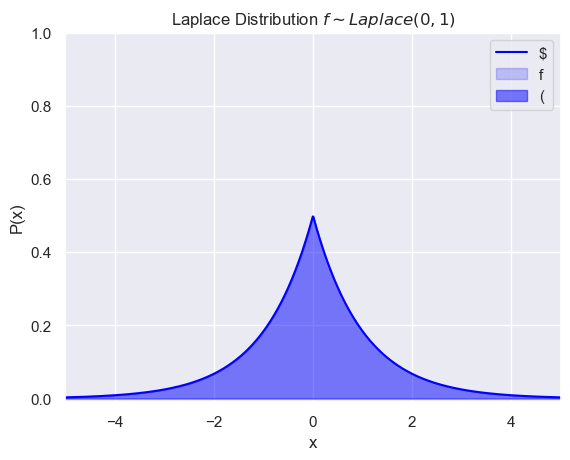

In [16]:
ax = sns.lineplot(x=x, y=y, color='blue')
ax.fill_between(x, y, color='blue', alpha=0.5)
plt.title(r'Laplace Distribution $f \sim Laplace(0, 1)$')
plt.legend('$f(x)$')
plt.ylabel('P(x)')
plt.xlabel(r'x')
plt.xlim(-5, 5)
plt.ylim(-0.01, 1)
plt.show();